In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

In [2]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])

In [3]:
labels = np.array([0]*700 + [1]*700 + [2]*700)

In [4]:
one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

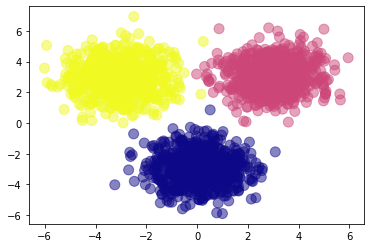

In [5]:
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [8]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)

Loss function value:  3101.2779592613765
Loss function value:  20.51856759696088
Loss function value:  13.41539643356695
Loss function value:  10.806239114192767
Loss function value:  9.293853043370653
Loss function value:  8.222335562342458
Loss function value:  7.427291388788856
Loss function value:  6.8159573355109835
Loss function value:  6.3288007427772985
Loss function value:  5.929800342065819
Loss function value:  5.595779425599993
Loss function value:  5.311118805512472
Loss function value:  5.064894173306703
Loss function value:  4.849225960985247
Loss function value:  4.658281872646846
Loss function value:  4.487648995564465
Loss function value:  4.333924545010694
Loss function value:  4.1944409886297365
Loss function value:  4.067076566158792
Loss function value:  3.9501216803739436
Loss function value:  3.842182788817019
Loss function value:  3.74211203975868
Loss function value:  3.64895493848814
Loss function value:  3.561910868828659
Loss function value:  3.480302928291

Loss function value:  0.6728466698172141
Loss function value:  0.6691566029784589
Loss function value:  0.6655004408652807
Loss function value:  0.6618777601441346
Loss function value:  0.6582881440564665
Loss function value:  0.6547311822959547
Loss function value:  0.6512064708885411
Loss function value:  0.6477136120750694
Loss function value:  0.6442522141965408
Loss function value:  0.6408218915819195
Loss function value:  0.6374222644383685
Loss function value:  0.6340529587438419
Loss function value:  0.6307136061421299
Loss function value:  0.6274038438400551
Loss function value:  0.6241233145069205
Loss function value:  0.6208716661761517
Loss function value:  0.6176485521490068
Loss function value:  0.6144536309003228
Loss function value:  0.6112865659862843
Loss function value:  0.6081470259541553
Loss function value:  0.6050346842538706
Loss function value:  0.6019492191514677
Loss function value:  0.5988903136443752
Loss function value:  0.5958576553784537
Loss function va